In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

In [38]:
def acquire():
    r = pd.read_csv('langr_raw.csv')
    python = pd.read_csv('langp_raw.csv')
    return r, python

In [14]:
r, python = acquire()

In [15]:
r

,Unnamed: 0,repo,language,readme_contents
0,0,ujjwalkarn/DataScienceR,R,# R Data Science Tutorials\n- This repo contai...
1,1,IndrajeetPatil/ggstatsplot,R,---\noutput: github_document\n---\n\n <!-- RE...
2,2,easystats/easystats,R,"---\noutput: github_document\n---\n\n```{r, wa..."
3,3,seandavi/sars2pack,R,---\noutput: \n - rmarkdown::github_document\...
4,4,markvanderloo/lumberjack,R,## Track changes in data\n[![Build Status](htt...
...,...,...,...,...
170,170,leenock/ML,R,��#
171,171,Phelipe-Sempreboni/data-science,R,# Data Science\n\n---\n\n### Esse repositório ...
172,172,fernandapilat/r-para-data-science,R,# R para Data Science\n\nRepositório criado pa...
173,173,lcasilva/Projeto_DSA_Feedback2,R,# Projeto_Feedback2\nProjeto Feedback 2: Machi...


In [16]:
python

,Unnamed: 0,repo,language,readme_contents
0,0,ludwig-ai/ludwig,Python,![Ludwig logo](https://github.com/ludwig-ai/lu...
1,1,modin-project/modin,Python,"<p align=""center""><a href=""https://modin.readt..."
2,2,Netflix/metaflow,Python,![Metaflow_Logo_Horizontal_FullColor_Ribbon_Da...
3,3,lk-geimfari/mimesis,Python,Mimesis: The Fake Data Generator\n------------...
4,4,holoviz/panel,Python,"<a href=""https://panel.holoviz.org/"">\n <pict..."
...,...,...,...,...
175,175,rahulbordoloi/Machine-Learning,Python,# Machine-Learning\nContains my Glossary for M...
176,176,Oslandia/QDeeplandia,Python,QGIS plugin dedicated to 2D semantic segmentat...
177,177,arjunbhasin2013/BaselinePredictionMLFramework,Python,# Baseline Prediction Machine Learning Framewo...
178,178,PonderaLab/datascience4economists,Python,"# Datascience4economists\n\nFirst of all, welc..."


In [17]:
def prepare_mvp():
    r, python = acquire()
    df = pd.concat([r, python], ignore_index = True)
    return df

In [18]:
df = prepare_mvp()

In [39]:
df.tail(5)

,Unnamed: 0,repo,language,readme_contents
350,175,rahulbordoloi/Machine-Learning,Python,# Machine-Learning\nContains my Glossary for M...
351,176,Oslandia/QDeeplandia,Python,QGIS plugin dedicated to 2D semantic segmentat...
352,177,arjunbhasin2013/BaselinePredictionMLFramework,Python,# Baseline Prediction Machine Learning Framewo...
353,178,PonderaLab/datascience4economists,Python,"# Datascience4economists\n\nFirst of all, welc..."
354,179,joaoariedi/etl_luigi,Python,# LUIGI and PostgreSQL ETL tests\nGet data fro...


In [43]:
train, test = train_test_split(df, 
                               stratify=df['language'], 
                               train_size=0.8, 
                               random_state=1729)


In [44]:
train, validate = train_test_split(df, 
                                   stratify=df['language'], 
                                   train_size=0.7, 
                                   random_state=1729)

In [46]:
X_train = train.drop(columns = ['repo','readme_contents'])
y_train = train.language

In [47]:
X_validate = validate.drop(columns = ['repo','readme_contents'])
y_validate = validate.language

In [48]:
X_test = test.drop(columns = ['repo','readme_contents'])
y_test = test.language

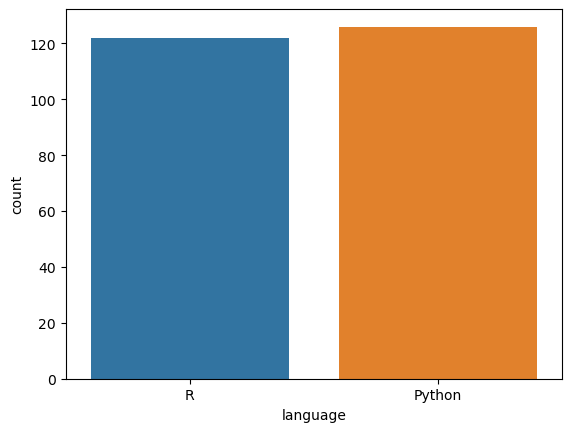

In [63]:
lang_count = sns.countplot(x=train['language'],data=df)